In [36]:
import matplotlib
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
x = np.linspace(-50, 50, 5000)
def func1(_x): return (x**2) * (np.sin(0.5 * x)**2 + 1)
def grad1(_x): return (x**2) * np.cos(0.5*x) * np.sin(0.5 * x) + 2 * x * (np.sin(0.5 * x))**2 + 2 * x 

In [38]:
def calculate_grad(func, x0, delta=0.01): return (func(x0+delta)-func(x0))/delta
def calculate_grad2(func, x0, delta=0.01): return (func(x0+delta)-func(x0-delta))/(2*delta)

In [39]:
x0=np.random.uniform(-50, 50)
print('true grad', grad1(x0))
print('method1', calculate_grad(func1, x0))
print('method2', calculate_grad2(func1, x0))

true grad [ 226.21686855  249.76574847  273.11664707 ... -273.11664707 -249.76574847
 -226.21686855]
method1 [0. 0. 0. ... 0. 0. 0.]
method2 [0. 0. 0. ... 0. 0. 0.]


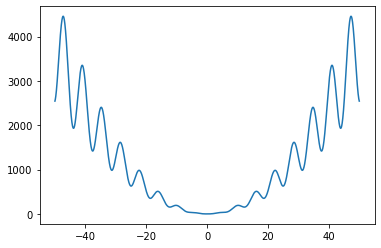

In [40]:
plt.plot(x, func1(x))
plt.show()

In [41]:
from scipy.optimize import minimize

In [42]:
x0=np.random.uniform(-50, 50)
alpha=0.12
n_iter=75
for x in range(n_iter):
    print(x0, func1(x0))
    x0-=alpha*grad1(x0)

16.80594706358019 0.0
16.80594706358019 1.2298488470659301
16.460295081195895 6.832293673094284
15.422188457986417 17.954966234702002
13.909586354857929 29.229148966908895
12.882367812339005 33.954222681709666
12.69095153561165 36.71693484029341
11.825811618109594 55.029394768589036
8.00754891152473 100.65600108187563
1.1887332120346743 158.4007756063294
-5.0381833090757135 191.95357645382262
-6.380942478631237 181.23224527172292
-3.0751716577289034 155.24251497126056
-1.544031945630357 176.8207469674584
-9.06890871999019 280.5997526156323
-25.528732696372703 422.96489019661743
-41.07505678163966 506.58041348139324
-44.25156803988516 473.2611023484557
-34.2622687403189 379.02869326445904
-24.716792573270304 363.0388164173062
-32.54888640510425 518.3835876373216
-60.680175474215176 782.2743018794512
-91.75836140564437 967.9905199875021
-102.06121596553288 934.4343338781836
-84.95279947313314 741.8364458869448
-61.07437574105367 627.7491212926644
-62.13757667679676 795.3412690529196
-100

In [43]:
class optimizer:
    def __init__(self, alpha, n_iter):
        self.alpha=alpha
        self.n_iter=n_iter
    def fit(self, func, grad, x0):
        for i in range(self.n_iter):
            x0-=self.alpha*grad(x0)
        return x0
opt1=optimizer(alpha, 75)
x=opt1.fit(func1, grad1, np.random.uniform(-50, 50))
print(x, func1(x))

22430.47846488583 533092992.5445287


In [44]:
data, target, coef = datasets.make_regression(n_samples = 1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [45]:
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [53]:
def mserror(X, w, y):
    y_pred = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [47]:
w = np.zeros(2)
 
w_list = [w.copy()]
 
errors = []
 
eta = 0.5
 
max_iter = 1e4
 
min_weight_dist = 1e-8
 
weight_dist = np.inf
 
iter_num = 0
 
np.random.seed(1234)
 
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
 
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 38.5913


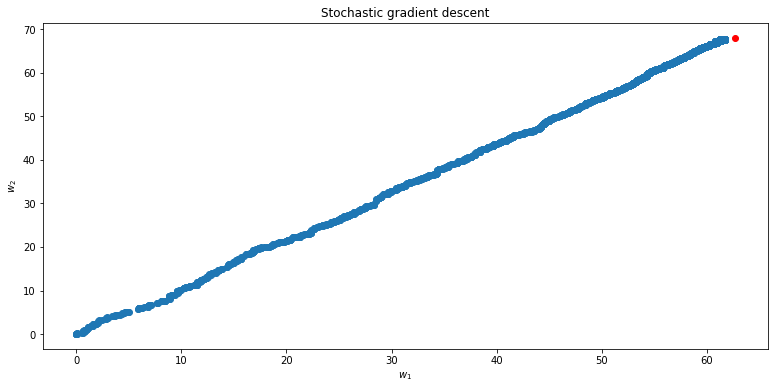

In [48]:
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')
# plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

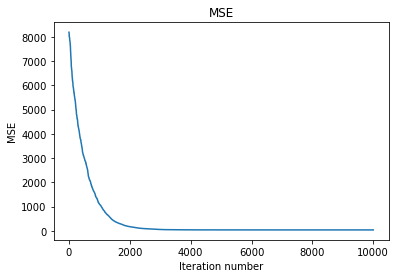

In [49]:
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')